In [121]:
import pandas as pd
import numpy as np

import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline

In [2]:
data = pd.read_csv("../Data_files/2017Q1.csv")

all_quarter = [ '2017Q2', '2017Q3', '2017Q4']

for Quarter in all_quarter:
    data2 = pd.read_csv("../Data_files/"+ Quarter +".csv")
    data = pd.concat([data, data2])

# Training and testing

In [3]:
df = pd.read_csv("../Data_files/2003Q1.csv")
df = df[0:0]

In [4]:
df.to_csv('base.csv')

In [5]:
data = pd.read_csv("base.csv")

years = list(map(str, range(2017, 2018)))
quarters = [ 'Q1', 'Q2', 'Q3', 'Q4']
for year in years:
    for quarter in quarters:
        data2 = pd.read_csv("../Data_files/"+ year + quarter +".csv")
        data = pd.concat([data, data2])
        
data.reset_index(inplace = True)

In [6]:
#there are many columns which have turned to be null columns after filtering.
print(data.shape)
current_size = data.shape[0]
all_null_columns = []

All_columns = data.columns
for column in All_columns:
    print(column, len(data[column].unique()))
    nulls = data[column].isnull().sum()
    if nulls==current_size:
        all_null_columns.append(column)
all_null_columns

(2610, 70)
index 744
Unnamed: 0 1
LOAN_ID 2610
ACT_PERIOD 65
CHANNEL 3
SELLER 51
SERVICER 1
ORIG_RATE 63
CURR_RATE 52
ORIG_UPB 422
CURRENT_UPB 1
ORIG_TERM 10
ORIG_DATE 20
FIRST_PAY 20
LOAN_AGE 1
REM_MONTHS 1
ADJ_REM_MONTHS 1
MATR_DT 1
OLTV 68
OCLTV 76
NUM_BO 3
DTI 43
CSCORE_B 204
CSCORE_C 179
FIRST_FLAG 2
PURPOSE 3
PROP 5
NO_UNITS 4
OCC_STAT 3
STATE 51
MSA 320
ZIP 686
MI_PCT 8
PRODUCT 1
PPMT_FLG 1
IO 1
DLQ_STATUS 57
PMT_HISTORY 1
MOD_FLAG 3
Zero_Bal_Code 4
ZB_DTE 65
LAST_UPB 2609
TOT_SCHD_PRNCPL 13
LAST_PAID_INSTALLMENT_DATE 73
FORECLOSURE_DATE 66
DISPOSITION_DATE 65
FORECLOSURE_COSTS 2118
PROPERTY_PRESERVATION_AND_REPAIR_COSTS 1238
ASSET_RECOVERY_COSTS 154
MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS 1725
ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY 1687
NET_SALES_PROCEEDS 2054
CREDIT_ENHANCEMENT_PROCEEDS 972
REPURCHASES_MAKE_WHOLE_PROCEEDS 36
OTHER_FORECLOSURE_PROCEEDS 865
NON_INTEREST_BEARING_UPB 82
PRINCIPAL_FORGIVENESS_AMOUNT 2
MI_TYPE 3
SERV_IND 1
HOMEREADY_PROGRAM_INDICATOR 3
FORECLOSURE

['Unnamed: 0',
 'SERVICER',
 'LOAN_AGE',
 'REM_MONTHS',
 'ADJ_REM_MONTHS',
 'MATR_DT',
 'PMT_HISTORY',
 'SERV_IND']

In [7]:
data.drop(all_null_columns, axis=1, inplace = True)

Loss/Loss-given-defalut calculation

In [9]:
ICdata = data[['DISPOSITION_DATE','ZB_DTE', 'LAST_PAID_INSTALLMENT_DATE','CURR_RATE', 'ORIG_RATE','LAST_UPB', 'NON_INTEREST_BEARING_UPB']]

ICdata.isnull().sum()

DISPOSITION_DATE               369
ZB_DTE                           0
LAST_PAID_INSTALLMENT_DATE       4
CURR_RATE                     1134
ORIG_RATE                        0
LAST_UPB                         0
NON_INTEREST_BEARING_UPB      2412
dtype: int64

In [10]:
# the columns CURR_RATE and NON_INTEREST_BEARING_UPB have high null value

#The NON_INTEREST_BEARING_UPB can be made zero for Nan value
#Substitute CURR_RATE with Origination_rate
#Substituting Disposition_date with Zero_balance_effective_date
data['NON_INTEREST_BEARING_UPB'] = data['NON_INTEREST_BEARING_UPB'].fillna(0)
data['CURR_RATE'] = data['CURR_RATE'].fillna(data['ORIG_RATE'])
data['DISPOSITION_DATE'] = data['DISPOSITION_DATE'].fillna(data['ZB_DTE'])

In [11]:
# removing all rows which don't have values for atleast 1 column
data = data.dropna(subset = ['DISPOSITION_DATE','LAST_PAID_INSTALLMENT_DATE','CURR_RATE','LAST_UPB', 'NON_INTEREST_BEARING_UPB'])

In [12]:
data['LAST_PAID_INSTALLMENT_DATE'] = data['LAST_PAID_INSTALLMENT_DATE'].astype('Int64').astype(str)
data['DISPOSITION_DATE'] = data['DISPOSITION_DATE'].astype('Int64').astype(str)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10460\3652237799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LAST_PAID_INSTALLMENT_DATE'] = data['LAST_PAID_INSTALLMENT_DATE'].astype('Int64').astype(str)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10460\3652237799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISPOSITION_DATE'] = data['DISPOSITION_DATE'].astype('Int64').astype(str)


In [13]:
data[['DISPOSITION_DATE','LAST_PAID_INSTALLMENT_DATE','CURR_RATE','LAST_UPB', 'NON_INTEREST_BEARING_UPB']]

,DISPOSITION_DATE,LAST_PAID_INSTALLMENT_DATE,CURR_RATE,LAST_UPB,NON_INTEREST_BEARING_UPB
0,62021,32020,4.750,148193.02,0.00
1,92018,62017,4.375,134615.89,0.00
2,122022,62020,3.500,186524.59,0.00
3,62021,62019,5.000,28989.51,0.00
4,32019,102017,4.625,110954.97,0.00
...,...,...,...,...,...
2605,102021,72019,4.125,151906.23,14985.22
2606,32020,52019,4.625,97329.06,0.00
2607,32020,112018,4.125,56396.83,0.00
2608,72020,92017,4.875,104760.00,0.00


In [14]:
data['INT_COST'] =  (data['DISPOSITION_DATE'].str[-4:].astype(float) * 12 + \
                                     data['DISPOSITION_DATE'].str[:-4].astype(float) - \
                                     data['LAST_PAID_INSTALLMENT_DATE'].str[-4:].astype(float) * 12 - \
                                     data['LAST_PAID_INSTALLMENT_DATE'].str[:-4].astype(float)) * \
                                      (((data['CURR_RATE'].astype(float) / 100) - 0.0035) / 12) * \
                                     (data['LAST_UPB'] - data['NON_INTEREST_BEARING_UPB'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_10460\2541202032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['INT_COST'] =  (data['DISPOSITION_DATE'].str[-4:].astype(float) * 12 + \


In [15]:
#columns needed for LOSS calculation
#'INT_COST',
Ldata  = data[['LAST_UPB', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS', 'ASSET_RECOVERY_COSTS', 
               'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
    'PRINCIPAL_FORGIVENESS_AMOUNT',  'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS', 'Zero_Bal_Code']]

Ldata.isnull().sum()

LAST_UPB                                         0
FORECLOSURE_COSTS                              446
PROPERTY_PRESERVATION_AND_REPAIR_COSTS         448
ASSET_RECOVERY_COSTS                           449
MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS     448
ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY          449
PRINCIPAL_FORGIVENESS_AMOUNT                  2378
NET_SALES_PROCEEDS                             449
CREDIT_ENHANCEMENT_PROCEEDS                    449
OTHER_FORECLOSURE_PROCEEDS                     449
Zero_Bal_Code                                    0
dtype: int64

In [16]:
Ldata #[Ldata['PROPERTY_PRESERVATION_AND_REPAIR_COSTS'].notnull()]

,LAST_UPB,FORECLOSURE_COSTS,PROPERTY_PRESERVATION_AND_REPAIR_COSTS,ASSET_RECOVERY_COSTS,MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS,ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY,PRINCIPAL_FORGIVENESS_AMOUNT,NET_SALES_PROCEEDS,CREDIT_ENHANCEMENT_PROCEEDS,OTHER_FORECLOSURE_PROCEEDS,Zero_Bal_Code
0,148193.02,6951.26,815.00,0.0,442.34,1504.06,NaN,150001.00,12958.18,0.00,2.0
1,134615.89,4304.14,19745.11,0.0,-22.47,745.61,NaN,146387.65,22669.28,45.00,9.0
2,186524.59,0.00,18.46,0.0,0.00,0.00,NaN,193396.41,0.00,0.00,15.0
3,28989.51,6319.10,4076.75,0.0,1467.26,3348.79,NaN,16001.00,15367.44,0.00,2.0
4,110954.97,4197.51,7956.91,0.0,331.13,1842.16,NaN,89260.10,0.00,2550.83,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2605,151906.23,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,9.0
2606,97329.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
2607,56396.83,7222.84,0.00,0.0,-606.54,1839.04,NaN,35733.41,19602.43,20.09,2.0
2608,104760.00,8761.49,31909.37,0.0,3862.50,1085.80,NaN,115600.70,24256.33,25.00,9.0


In [17]:
# the principal forgiveness amount has high number of null values,
# if it is null it can be replaced with 0,
# in general all the values in the costs if not present can be replaced by 0

data['PRINCIPAL_FORGIVENESS_AMOUNT'] = data['PRINCIPAL_FORGIVENESS_AMOUNT'].fillna(0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10460\4154019460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PRINCIPAL_FORGIVENESS_AMOUNT'] = data['PRINCIPAL_FORGIVENESS_AMOUNT'].fillna(0)


In [18]:
# Converting the null values in all the following columns to zero

data['FORECLOSURE_COSTS'].fillna(0, inplace=True)
data['PROPERTY_PRESERVATION_AND_REPAIR_COSTS'].fillna(0, inplace=True)
data['ASSET_RECOVERY_COSTS'].fillna(0, inplace=True)
data['MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS'].fillna(0, inplace=True)
data['ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY'].fillna(0, inplace=True)
data['PRINCIPAL_FORGIVENESS_AMOUNT'].fillna(0, inplace=True)
data['INT_COST'].fillna(0, inplace=True)
data['NET_SALES_PROCEEDS'].fillna(0, inplace=True)
data['CREDIT_ENHANCEMENT_PROCEEDS'].fillna(0, inplace=True)
data['OTHER_FORECLOSURE_PROCEEDS'].fillna(0, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10460\323050928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FORECLOSURE_COSTS'].fillna(0, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10460\323050928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PROPERTY_PRESERVATION_AND_REPAIR_COSTS'].fillna(0, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10460\323050928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [19]:
data['LOSS'] = (data['LAST_UPB'] + \
               data['FORECLOSURE_COSTS'] + \
               data['PROPERTY_PRESERVATION_AND_REPAIR_COSTS'] + \
               data['ASSET_RECOVERY_COSTS'] + \
               data['MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS'] + \
               data['ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY'] + \
               data['PRINCIPAL_FORGIVENESS_AMOUNT'] + \
               data['INT_COST'] - \
               data['NET_SALES_PROCEEDS'] - \
               data['CREDIT_ENHANCEMENT_PROCEEDS'] - \
               data['OTHER_FORECLOSURE_PROCEEDS'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_10460\200544122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LOSS'] = (data['LAST_UPB'] + \


<Axes: >

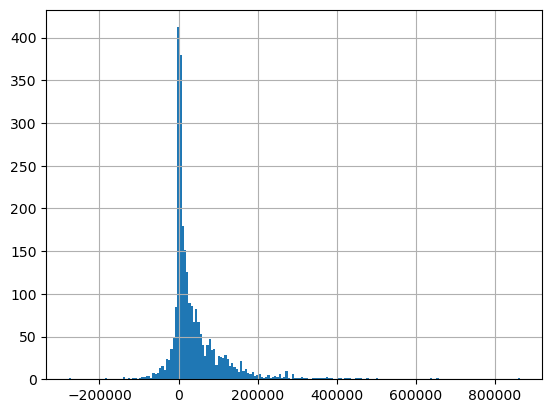

In [20]:
data['LOSS'].hist(bins=200)

In [21]:
# there are no rows where is ~ 0 LOSS
data[(data['LOSS']<1) & (data['LOSS']>-1)]

,index,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,ORIG_RATE,CURR_RATE,ORIG_UPB,CURRENT_UPB,ORIG_TERM,...,HIGH_BALANCE_LOAN_INDICATOR,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB,PROPERTY_INSPECTION_WAIVER_INDICATOR,INT_COST,LOSS


integrate the macroeconomic & state wise variables

In [22]:
FHA30yr_data = pd.read_csv("./MacroEconomicToMerge/FHA30YearRate.csv")
FHA30yr_data.drop("DATE", axis = 1, inplace=True)

Unemployment_data = pd.read_csv("./MacroEconomicToMerge/UnemploymentRate.csv", index_col=0)

In [23]:
data = data.merge(FHA30yr_data, on = 'ZB_DTE', how='left')

Unemployment_data = Unemployment_data.rename({'DATE': 'ZB_DTE'}, axis = 1)
data = data.merge(Unemployment_data, on = 'ZB_DTE', how='left')


In [24]:
from state_foreclosure import method_of_foreclosure_and_time

method_of_foreclosure_and_time = pd.DataFrame(method_of_foreclosure_and_time, columns=['STATE', 'method_of_foreclosurer', 'time_to_foreclose'] )

In [25]:
data = data.merge(method_of_foreclosure_and_time, on = 'STATE', how='left')

Categorical column formatting

In [26]:
# constrainting big column names
data.rename({'HIGH_BALANCE_LOAN_INDICATOR': 'HIGH_BAl',
             'method_of_foreclosurer' : 'method_fore',
             'FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT': 'principal_writeoff'
            }, axis=1, inplace=True)

In [27]:
fdata = pd.get_dummies(data, columns=['PURPOSE', 'HIGH_BAl', 'method_fore'])


In [28]:
fdata.drop('HIGH_BAl_N', axis= 1, inplace=True)
#fdata.rename({'HIGH_BALANCE_LOAN_INDICATOR_Y': 'HIGH_BAl'}, axis=1, inplace=True)

In [65]:
fdata['OCLTV']

0        90
1       104
2        51
3        97
4        80
       ... 
2601     97
2602     65
2603     95
2604    100
2605     95
Name: OCLTV, Length: 2606, dtype: object

numerical column filtering

In [67]:
#there are many columns which have turned to be null columns after filtering.
print(fdata.shape)
current_size = fdata.shape[0]
all_null_columns = []

All_columns = fdata.columns
for column in All_columns:
    print(column, len(fdata[column].unique()))
    nulls = fdata[column].isnull().sum()
    if nulls==current_size:
        all_null_columns.append(column)
        
print("These are all the null columns--------------")
print(all_null_columns)

(2606, 73)
index 743
LOAN_ID 2606
ACT_PERIOD 65
CHANNEL 3
SELLER 51
ORIG_RATE 63
CURR_RATE 63
ORIG_UPB 421
CURRENT_UPB 1
ORIG_TERM 10
ORIG_DATE 20
FIRST_PAY 20
OLTV 68
OCLTV 76
NUM_BO 3
DTI 43
CSCORE_B 204
CSCORE_C 179
FIRST_FLAG 2
PROP 5
NO_UNITS 4
OCC_STAT 3
STATE 51
MSA 319
ZIP 686
MI_PCT 8
PRODUCT 1
PPMT_FLG 1
IO 1
DLQ_STATUS 57
MOD_FLAG 3
Zero_Bal_Code 4
ZB_DTE 65
LAST_UPB 2605
TOT_SCHD_PRNCPL 9
LAST_PAID_INSTALLMENT_DATE 72
FORECLOSURE_DATE 66
DISPOSITION_DATE 64
FORECLOSURE_COSTS 2114
PROPERTY_PRESERVATION_AND_REPAIR_COSTS 1237
ASSET_RECOVERY_COSTS 153
MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS 1724
ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY 1686
NET_SALES_PROCEEDS 2051
CREDIT_ENHANCEMENT_PROCEEDS 969
REPURCHASES_MAKE_WHOLE_PROCEEDS 36
OTHER_FORECLOSURE_PROCEEDS 863
NON_INTEREST_BEARING_UPB 81
PRINCIPAL_FORGIVENESS_AMOUNT 1
MI_TYPE 3
HOMEREADY_PROGRAM_INDICATOR 3
principal_writeoff 2
RELOCATION_MORTGAGE_INDICATOR 2
FORBEARANCE_INDICATOR 2
HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDI

In [68]:
all_null_columns

[]

In [71]:
fdata.drop(all_null_columns, axis=1, inplace = True)

In [101]:
fdata['OCLTV'] = fdata['OCLTV'].astype(int)

In [102]:
col_types = fdata.dtypes
numerical_cols = list(col_types[col_types != 'object'].index)
non_num_cols =  list(col_types[col_types == 'object'].index)
print("These are the numerical columns--------\n", numerical_cols)

#these are written as numerical columns but are not.
phy_attributes = ['LOAN_ID', 'NUM_BO', 'ZIP', 'Zero_Bal_Code',
                  'MI_TYPE', 'HOMEREADY_PROGRAM_INDICATOR', 'FORBEARANCE_INDICATOR', 'ADR_COUNT']
dates_cols = ['ACT_PERIOD', 'ORIG_DATE', 'FIRST_PAY', 'ZB_DTE', 'FORECLOSURE_DATE' ]

These are the numerical columns--------
 ['index', 'ORIG_RATE', 'CURR_RATE', 'ORIG_UPB', 'CURRENT_UPB', 'OCLTV', 'DTI', 'CSCORE_B', 'CSCORE_C', 'ZIP', 'MI_PCT', 'Zero_Bal_Code', 'ZB_DTE', 'LAST_UPB', 'TOT_SCHD_PRNCPL', 'FORECLOSURE_DATE', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS', 'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY', 'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'REPURCHASES_MAKE_WHOLE_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS', 'NON_INTEREST_BEARING_UPB', 'PRINCIPAL_FORGIVENESS_AMOUNT', 'MI_TYPE', 'principal_writeoff', 'FORBEARANCE_INDICATOR', 'ADR_COUNT', 'ADR_UPB', 'INT_COST', 'LOSS', 'FHA_Mean', 'UNRATE', 'PURPOSE_C', 'PURPOSE_P', 'PURPOSE_R', 'HIGH_BAl_Y', 'method_fore_Entry and Possession', 'method_fore_Judicial', 'method_fore_Power-of-Sale', 'method_fore_Strict Foreclosure']


In [103]:
dependency_columns = ['INT_COST', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS' ,
     'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY', 
        'PRINCIPAL_FORGIVENESS_AMOUNT',  'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS']

working_columns = list(set(numerical_cols) - set(phy_attributes+dates_cols+dependency_columns))

In [104]:
working_columns

['FHA_Mean',
 'principal_writeoff',
 'index',
 'method_fore_Power-of-Sale',
 'CURRENT_UPB',
 'CSCORE_C',
 'method_fore_Entry and Possession',
 'UNRATE',
 'ORIG_RATE',
 'ORIG_UPB',
 'OCLTV',
 'MI_PCT',
 'CURR_RATE',
 'PURPOSE_R',
 'PURPOSE_P',
 'method_fore_Judicial',
 'method_fore_Strict Foreclosure',
 'CSCORE_B',
 'NON_INTEREST_BEARING_UPB',
 'ADR_UPB',
 'TOT_SCHD_PRNCPL',
 'REPURCHASES_MAKE_WHOLE_PROCEEDS',
 'DTI',
 'HIGH_BAl_Y',
 'LAST_UPB',
 'LOSS',
 'PURPOSE_C']

In [105]:
wdata = fdata[working_columns]
wdata.isnull().sum(axis = 0)

FHA_Mean                               0
principal_writeoff                  2378
index                                  0
method_fore_Power-of-Sale              0
CURRENT_UPB                            0
CSCORE_C                            2116
method_fore_Entry and Possession       0
UNRATE                                 0
ORIG_RATE                              0
ORIG_UPB                               0
OCLTV                                  0
MI_PCT                              1055
CURR_RATE                              0
PURPOSE_R                              0
PURPOSE_P                              0
method_fore_Judicial                   0
method_fore_Strict Foreclosure         0
CSCORE_B                               5
NON_INTEREST_BEARING_UPB               0
ADR_UPB                             2568
TOT_SCHD_PRNCPL                     1141
REPURCHASES_MAKE_WHOLE_PROCEEDS      449
DTI                                    0
HIGH_BAl_Y                             0
LAST_UPB        

In [106]:
#there are many columns which have turned to be null columns after filtering.
print(wdata.shape)
current_size = wdata.shape[0]
all_null_columns = []

All_columns = wdata.columns
for column in All_columns:
    print(column, len(wdata[column].unique()))
    nulls = wdata[column].isnull().sum()
    if nulls==current_size:
        all_null_columns.append(column)
all_null_columns

(2606, 27)
FHA_Mean 64
principal_writeoff 2
index 743
method_fore_Power-of-Sale 2
CURRENT_UPB 1
CSCORE_C 179
method_fore_Entry and Possession 2
UNRATE 27
ORIG_RATE 63
ORIG_UPB 421
OCLTV 76
MI_PCT 8
CURR_RATE 63
PURPOSE_R 2
PURPOSE_P 2
method_fore_Judicial 2
method_fore_Strict Foreclosure 2
CSCORE_B 204
NON_INTEREST_BEARING_UPB 81
ADR_UPB 39
TOT_SCHD_PRNCPL 9
REPURCHASES_MAKE_WHOLE_PROCEEDS 36
DTI 43
HIGH_BAl_Y 2
LAST_UPB 2605
LOSS 2606
PURPOSE_C 2


[]

In [107]:
#Model 2 - predict Loss Given default from the data
wdata['Lossper_GD'] = wdata['LOSS']/data['LAST_UPB']
wdata['Lossper_GD']

C:\Users\Admin\AppData\Local\Temp\ipykernel_10460\1064008143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdata['Lossper_GD'] = wdata['LOSS']/data['LAST_UPB']


0       0.020899
1      -0.021846
2       0.042008
3       0.535676
4       0.362232
          ...   
2601    1.076559
2602    1.035625
2603    0.218716
2604    0.228410
2605    0.012473
Name: Lossper_GD, Length: 2606, dtype: float64

In [108]:
wdata.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10460\1410648804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdata.replace([np.inf, -np.inf], np.nan, inplace=True)


In [109]:
wdata.drop(all_null_columns, axis=1, inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10460\4200858058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdata.drop(all_null_columns, axis=1, inplace = True)


In [110]:
wdata.dropna(subset=["Lossper_GD"], how="all", inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10460\542106401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdata.dropna(subset=["Lossper_GD"], how="all", inplace=True)


In [111]:
wdata.isnull().sum(axis = 0)

FHA_Mean                               0
principal_writeoff                  2378
index                                  0
method_fore_Power-of-Sale              0
CURRENT_UPB                            0
CSCORE_C                            2116
method_fore_Entry and Possession       0
UNRATE                                 0
ORIG_RATE                              0
ORIG_UPB                               0
OCLTV                                  0
MI_PCT                              1055
CURR_RATE                              0
PURPOSE_R                              0
PURPOSE_P                              0
method_fore_Judicial                   0
method_fore_Strict Foreclosure         0
CSCORE_B                               5
NON_INTEREST_BEARING_UPB               0
ADR_UPB                             2568
TOT_SCHD_PRNCPL                     1141
REPURCHASES_MAKE_WHOLE_PROCEEDS      449
DTI                                    0
HIGH_BAl_Y                             0
LAST_UPB        

Linear Models


In [112]:
wdata

,FHA_Mean,principal_writeoff,index,method_fore_Power-of-Sale,CURRENT_UPB,CSCORE_C,method_fore_Entry and Possession,UNRATE,ORIG_RATE,ORIG_UPB,...,NON_INTEREST_BEARING_UPB,ADR_UPB,TOT_SCHD_PRNCPL,REPURCHASES_MAKE_WHOLE_PROCEEDS,DTI,HIGH_BAl_Y,LAST_UPB,LOSS,PURPOSE_C,Lossper_GD
0,2.9750,NaN,0,1,0.0,692.0,0,5.9,4.750,158000.0,...,0.00,NaN,0.0,0.0,35.0,0,148193.02,3097.116100,0,0.020899
1,4.3300,NaN,1,1,0.0,697.0,0,4.1,4.375,136000.0,...,0.00,NaN,NaN,0.0,35.0,0,134615.89,-2940.788034,0,-0.021846
2,6.3640,NaN,2,0,0.0,NaN,0,3.5,3.500,205000.0,...,0.00,NaN,0.0,0.0,40.0,0,186524.59,7835.451462,0,0.042008
3,2.9750,NaN,3,0,0.0,NaN,0,5.9,5.000,30000.0,...,0.00,NaN,0.0,0.0,18.0,0,28989.51,15528.994430,0,0.535676
4,4.5700,NaN,4,1,0.0,NaN,0,4.0,4.625,112000.0,...,0.00,NaN,NaN,0.0,34.0,0,110954.97,40191.460371,0,0.362232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,3.0675,0.0,662,0,0.0,NaN,0,4.5,4.125,150000.0,...,14985.22,NaN,0.0,NaN,47.0,0,151906.23,163535.958287,0,1.076559
2602,3.4500,NaN,663,1,0.0,NaN,0,4.4,4.625,100000.0,...,0.00,NaN,NaN,NaN,36.0,0,97329.06,100796.407762,1,1.035625
2603,2.8900,NaN,664,0,0.0,NaN,0,7.9,4.125,59000.0,...,0.00,NaN,0.0,0.0,32.0,0,56396.83,12334.880443,0,0.218716
2604,4.0720,NaN,665,0,0.0,NaN,0,3.7,4.875,105000.0,...,0.00,NaN,NaN,0.0,45.0,0,104760.00,23928.235000,0,0.228410


In [113]:
wdata.fillna(0, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10460\1646045930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdata.fillna(0, inplace=True)


In [114]:
wdata.isnull().sum(axis = 0)

FHA_Mean                            0
principal_writeoff                  0
index                               0
method_fore_Power-of-Sale           0
CURRENT_UPB                         0
CSCORE_C                            0
method_fore_Entry and Possession    0
UNRATE                              0
ORIG_RATE                           0
ORIG_UPB                            0
OCLTV                               0
MI_PCT                              0
CURR_RATE                           0
PURPOSE_R                           0
PURPOSE_P                           0
method_fore_Judicial                0
method_fore_Strict Foreclosure      0
CSCORE_B                            0
NON_INTEREST_BEARING_UPB            0
ADR_UPB                             0
TOT_SCHD_PRNCPL                     0
REPURCHASES_MAKE_WHOLE_PROCEEDS     0
DTI                                 0
HIGH_BAl_Y                          0
LAST_UPB                            0
LOSS                                0
PURPOSE_C   

In [44]:
import statsmodels.api as sm

In [45]:
# split into testing-traning set if not done already

In [46]:
# important before starting regression
wdata.fillna(0, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10460\334951759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdata.fillna(0, inplace=True)


In [47]:
wdata

,FHA_Mean,principal_writeoff,index,method_fore_Power-of-Sale,CURRENT_UPB,CSCORE_C,method_fore_Entry and Possession,UNRATE,ORIG_RATE,ORIG_UPB,...,NON_INTEREST_BEARING_UPB,ADR_UPB,TOT_SCHD_PRNCPL,REPURCHASES_MAKE_WHOLE_PROCEEDS,DTI,HIGH_BAl_Y,LAST_UPB,LOSS,PURPOSE_C,Lossper_GD
0,2.9750,0.0,0,1,0.0,692.0,0,5.9,4.750,158000.0,...,0.00,0.0,0.0,0.0,35.0,0,148193.02,3097.116100,0,0.020899
1,4.3300,0.0,1,1,0.0,697.0,0,4.1,4.375,136000.0,...,0.00,0.0,0.0,0.0,35.0,0,134615.89,-2940.788034,0,-0.021846
2,6.3640,0.0,2,0,0.0,0.0,0,3.5,3.500,205000.0,...,0.00,0.0,0.0,0.0,40.0,0,186524.59,7835.451462,0,0.042008
3,2.9750,0.0,3,0,0.0,0.0,0,5.9,5.000,30000.0,...,0.00,0.0,0.0,0.0,18.0,0,28989.51,15528.994430,0,0.535676
4,4.5700,0.0,4,1,0.0,0.0,0,4.0,4.625,112000.0,...,0.00,0.0,0.0,0.0,34.0,0,110954.97,40191.460371,0,0.362232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,3.0675,0.0,662,0,0.0,0.0,0,4.5,4.125,150000.0,...,14985.22,0.0,0.0,0.0,47.0,0,151906.23,163535.958287,0,1.076559
2602,3.4500,0.0,663,1,0.0,0.0,0,4.4,4.625,100000.0,...,0.00,0.0,0.0,0.0,36.0,0,97329.06,100796.407762,1,1.035625
2603,2.8900,0.0,664,0,0.0,0.0,0,7.9,4.125,59000.0,...,0.00,0.0,0.0,0.0,32.0,0,56396.83,12334.880443,0,0.218716
2604,4.0720,0.0,665,0,0.0,0.0,0,3.7,4.875,105000.0,...,0.00,0.0,0.0,0.0,45.0,0,104760.00,23928.235000,0,0.228410


Y = wdata['LOSS']
X = wdata.drop("LOSS", axis=1)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

results.summary

results.predict()

In [129]:
Y = wdata['Lossper_GD']
X = wdata.drop(["Lossper_GD","LOSS","index"], axis=1)
X = sm.add_constant(X)
model2 = sm.OLS(Y,X)
results2 = model2.fit()

In [130]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Lossper_GD   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     21.43
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           2.64e-78
Time:                        12:46:09   Log-Likelihood:                -1319.9
No. Observations:                2606   AIC:                             2686.
Df Residuals:                    2583   BIC:                             2821.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0726      0.326     -0.223      0.824      -0.712       0.567
FHA_Mean                             0.0632      0.007      9.297      0.000       0.050       0.077
principal_writeoff                 4.93e-13   8.31e-13      0.594      0.553   -1.14e-12    2.12e-12
method_fore_Power-of-Sale            0.0433      0.405      0.107      0.915      -0.750       0.837
CURRENT_UPB                       -1.93e-13   6.93e-13     -0.279      0.781   -1.55e-12    1.17e-12
CSCORE_C                          2.237e-05   2.93e-05      0.762      0.446   -3.52e-05    7.99e-05
method_fore_Entry and Possession     0.1576      0.452      0.349      0.727      -0.728       1.044
UNRATE                              -0.0005      0.006     -0.094      0.925      -0.012       0.011
ORIG_RATE                            0.0744      0.052      1.441      0.150      -0.027       0.176
ORIG_UPB                          4.699e-06   7.64e-07      6.147      0.000     3.2e-06     6.2e-06
OCLTV                                0.0050      0.001      4.801      0.000       0.003       0.007
MI_PCT                              -0.0021      0.001     -2.157      0.031      -0.004      -0.000
CURR_RATE                           -0.0948      0.050     -1.914      0.056      -0.192       0.002
PURPOSE_R                           -0.0192      0.110     -0.175      0.861      -0.234       0.196
PURPOSE_P                           -0.0719      0.111     -0.650      0.516      -0.289       0.145
method_fore_Judicial                 0.1467      0.405      0.362      0.717      -0.647       0.940
method_fore_Strict Foreclosure       0.2869      0.411      0.699      0.485      -0.518       1.092
CSCORE_B                            -0.0003      0.000     -1.919      0.055      -0.001    5.98e-06
NON_INTEREST_BEARING_UPB          2.047e-06   1.08e-06      1.899      0.058   -6.68e-08    4.16e-06
ADR_UPB                           2.183e-05   4.01e-06      5.445      0.000     1.4e-05    2.97e-05
TOT_SCHD_PRNCPL                  -2.883e-07   6.32e-07     -0.456      0.648   -1.53e-06    9.51e-07
REPURCHASES_MAKE_WHOLE_PROCEEDS   2.681e-06   2.59e-07     10.345      0.000    2.17e-06    3.19e-06
DTI                                  0.0013      0.001      1.318      0.188      -0.001       0.003
HIGH_BAl_Y                           0.1330      0.084      1.584      0.113      -0.032       0.298
LAST_UPB                          -5.71e-06   7.81e-07     -7.306      0.000   -7.24e-06   -4.18e-06
PURPOSE_C                            0.0185      0.109      0.169      0.866      -0.196       0.233
==============================================================================
Omnibus:                      282.219   Durbin-Watson:                   1.

# Further steps
1.
2. Try to fill na CSCORE_C(later)

Question--

Are we looking for strong associates of Loss variable?

In [50]:
#GAM model with smoothing splines
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines


x_spline = wdata[['OLTV', 'OCLTV']] 
bs = BSplines(x_spline, df=[12, 10], degree=[3, 3])

gam_bs = GLMGam.from_formula('Lossper_GD ~ ', data=wdata,
                              smoother=bs)
 

res_bs = gam_bs.fit()



print(res_bs.summary())

wdata.columns

# Forward Selection

In [138]:
X_test = X.loc[:,['UNRATE',
 'principal_writeoff',
 'CURR_RATE',
 'LAST_UPB',
 'ORIG_UPB',
 'ORIG_RATE']]

In [139]:
X_test

,UNRATE,principal_writeoff,CURR_RATE,LAST_UPB,ORIG_UPB,ORIG_RATE
0,5.9,0.0,4.750,148193.02,158000.0,4.750
1,4.1,0.0,4.375,134615.89,136000.0,4.375
2,3.5,0.0,3.500,186524.59,205000.0,3.500
3,5.9,0.0,5.000,28989.51,30000.0,5.000
4,4.0,0.0,4.625,110954.97,112000.0,4.625
...,...,...,...,...,...,...
2601,4.5,0.0,4.125,151906.23,150000.0,4.125
2602,4.4,0.0,4.625,97329.06,100000.0,4.625
2603,7.9,0.0,4.125,56396.83,59000.0,4.125
2604,3.7,0.0,4.875,104760.00,105000.0,4.875


In [132]:
Y_test = Y

In [133]:
Y

0       0.020899
1      -0.021846
2       0.042008
3       0.535676
4       0.362232
          ...   
2601    1.076559
2602    1.035625
2603    0.218716
2604    0.228410
2605    0.012473
Name: Lossper_GD, Length: 2606, dtype: float64

In [140]:
X_test.to_csv('X_test.csv')

In [141]:
Y_test.to_csv('Y_test.csv')

In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=12,
          forward=True,
          floating=False,
          scoring = 'neg_mean_squared_error',
          cv = 0)

In [53]:
sfs.fit(X, Y)
sfs.k_feature_names_

('FHA_Mean',
 'method_fore_Power-of-Sale',
 'CSCORE_C',
 'ORIG_UPB',
 'CURR_RATE',
 'PURPOSE_P',
 'method_fore_Strict Foreclosure',
 'CSCORE_B',
 'ADR_UPB',
 'REPURCHASES_MAKE_WHOLE_PROCEEDS',
 'DTI',
 'HIGH_BAl_Y')

In [54]:
feat_cols = list(sfs.k_feature_idx_)

In [55]:
feat_cols

[1, 3, 5, 9, 11, 13, 15, 16, 18, 20, 21, 22]

In [56]:
X.iloc[:,feat_cols]

,FHA_Mean,method_fore_Power-of-Sale,CSCORE_C,ORIG_UPB,CURR_RATE,PURPOSE_P,method_fore_Strict Foreclosure,CSCORE_B,ADR_UPB,REPURCHASES_MAKE_WHOLE_PROCEEDS,DTI,HIGH_BAl_Y
0,2.9750,1,692.0,158000.0,4.750,0,0,722.0,0.0,0.0,35.0,0
1,4.3300,1,697.0,136000.0,4.375,1,0,702.0,0.0,0.0,35.0,0
2,6.3640,0,0.0,205000.0,3.500,1,0,706.0,0.0,0.0,40.0,0
3,2.9750,0,0.0,30000.0,5.000,1,0,670.0,0.0,0.0,18.0,0
4,4.5700,1,0.0,112000.0,4.625,0,0,667.0,0.0,0.0,34.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2601,3.0675,0,0.0,150000.0,4.125,1,0,711.0,0.0,0.0,47.0,0
2602,3.4500,1,0.0,100000.0,4.625,0,0,710.0,0.0,0.0,36.0,0
2603,2.8900,0,0.0,59000.0,4.125,1,0,800.0,0.0,0.0,32.0,0
2604,4.0720,0,0.0,105000.0,4.875,1,0,646.0,0.0,0.0,45.0,0


In [58]:
sfs1 = SFS(LinearRegression(),
         k_features=(1,24),
         forward=True,
         floating=False,
         scoring = 'neg_mean_squared_error',
         cv=0)
sfs1.fit(X, Y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(),
                          k_features=(1, 24), scoring='neg_mean_squared_error')

C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


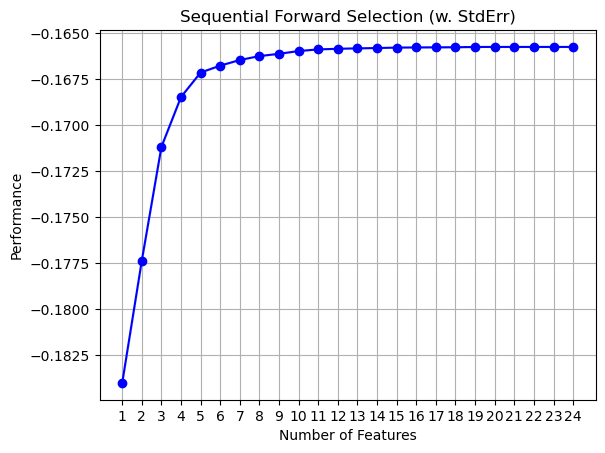

In [59]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [60]:
sfs1.get_metric_dict()

{1: {'feature_idx': (1,),
  'cv_scores': array([-0.1840208]),
  'avg_score': -0.18402079844286462,
  'feature_names': ('FHA_Mean',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (1, 9),
  'cv_scores': array([-0.17736846]),
  'avg_score': -0.1773684592172665,
  'feature_names': ('FHA_Mean', 'ORIG_UPB'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (1, 9, 20),
  'cv_scores': array([-0.17118823]),
  'avg_score': -0.17118822624091046,
  'feature_names': ('FHA_Mean', 'ORIG_UPB', 'REPURCHASES_MAKE_WHOLE_PROCEEDS'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (1, 3, 9, 20),
  'cv_scores': array([-0.16847317]),
  'avg_score': -0.168473167797335,
  'feature_names': ('FHA_Mean',
   'method_fore_Power-of-Sale',
   'ORIG_UPB',
   'REPURCHASES_MAKE_WHOLE_PROCEEDS'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (1, 3, 9, 18, 20),
  'cv_scores': array([-0.16714647]),
  'avg_sco

In [125]:
X_train = X.iloc[:,feat_cols]

In [126]:
X_train = sm.add_constant(X_train)
fs_model = sm.OLS(Y,X_train)
fs_results = fs_model.fit()

In [127]:
fs_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Lossper_GD   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     29.30
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.95e-63
Time:                        11:48:54   Log-Likelihood:                -1372.8
No. Observations:                2606   AIC:                             2772.
Df Residuals:                    2593   BIC:                             2848.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1073      0.189      0.566      0.571      -0.264       0.479
FHA_Mean                            0.0706      0.006     11.595      0.000       0.059       0.083
method_fore_Power-of-Sale          -0.0564      0.184     -0.306      0.759      -0.417       0.305
CSCORE_C                         3.488e-05   2.97e-05      1.176      0.240   -2.33e-05    9.31e-05
ORIG_UPB                        -7.912e-07   7.77e-08    -10.190      0.000   -9.43e-07   -6.39e-07
MI_PCT                             -0.0009      0.001     -1.395      0.163      -0.002       0.000
PURPOSE_R                           0.0165      0.025      0.654      0.513      -0.033       0.066
method_fore_Judicial                0.0454      0.184      0.247      0.805      -0.316       0.407
method_fore_Strict Foreclosure      0.1945      0.197      0.988      0.323      -0.192       0.581
NON_INTEREST_BEARING_UPB         2.298e-07   9.86e-07      0.233      0.816    -1.7e-06    2.16e-06
TOT_SCHD_PRNCPL                 -2.868e-08   6.32e-07     -0.045      0.964   -1.27e-06    1.21e-06
REPURCHASES_MAKE_WHOLE_PROCEEDS  2.619e-06   2.63e-07      9.942      0.000     2.1e-06    3.14e-06
DTI                                 0.0004      0.001      0.435      0.664      -0.002       0.002
==============================================================================
Omnibus:                      478.907   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1097.106
Skew:                           1.036   Prob(JB):                    5.84e-239
Kurtosis:                       5.411   Cond. No.                     9.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Diagnostic

## Residual vs Fitted plot

In [ ]:
model_fitted_y = fs_results.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='Lossper_GD', data=wdata, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

## Normality

In [ ]:
pred_val = fs_results.fittedvalues.copy()
true_val = data['Lossper_GD'].values.copy()
residual = true_val - pred_val

In [ ]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)

# Testing